#### For ANN Binary Classification
1) Activation Function Used in hidden layers - relu, LeakyReLU<br>
2) Activation function used in output layer - sigmoid<br>
3) Optimzier - adam, rmsprop, sgd<br>
4) Loss Function - binary_crossentropy<br>


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
df.shape

(303, 14)

In [30]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [31]:
d1 = df['output'].value_counts()
d1

1    165
0    138
Name: output, dtype: int64

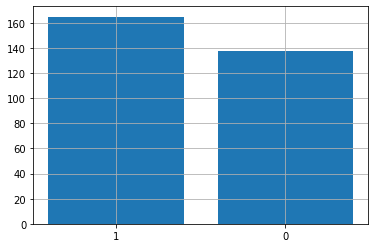

In [32]:
plt.bar(['1','0'],d1.values)
plt.grid()
plt.show()

In [33]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [34]:
x = df.iloc[:,:-1] # [age,sex, cp, trtbps, chol, fbs, restecg, thalachh ,exng, oldpeak, slp, caa, thall]
y = df.iloc[:,-1]  # output

In [35]:
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(303, 13)
(303,)


In [36]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [37]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=22)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227, 13)
(76, 13)
(227,)
(76,)


In [85]:
x_train.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2


In [86]:
from warnings import filterwarnings
filterwarnings('ignore')

#### Build ANN Binary Classification Architecture
Model - 1

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.activations import relu

In [88]:
m1 = Sequential()                                 # Input layer has 13 neurons
m1.add(Dense(50,activation='relu',input_dim=13))  # H1 has 50 neurons
m1.add(Dense(25,activation='relu'))               # H2 has 25 neurons
m1.add(Dense(13,activation='relu'))               # H3 has 13 neurons
m1.add(Dense(1,activation='sigmoid'))             # Output layer has 1 neurons

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
h1 = m1.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Train on 227 samples, validate on 76 samples
Epoch 1/50
227/227 [==============================] - 1s 3ms/sample - loss: 4.3012 - accuracy: 0.5286 - val_loss: 2.2325 - val_accuracy: 0.4079
Epoch 2/50
227/227 [==============================] - 0s 82us/sample - loss: 2.0023 - accuracy: 0.5110 - val_loss: 1.3632 - val_accuracy: 0.6053
Epoch 3/50
227/227 [==============================] - 0s 92us/sample - loss: 1.3339 - accuracy: 0.6079 - val_loss: 1.1487 - val_accuracy: 0.6053
Epoch 4/50
227/227 [==============================] - 0s 94us/sample - loss: 1.0102 - accuracy: 0.6123 - val_loss: 1.0292 - val_accuracy: 0.6316
Epoch 5/50
227/227 [==============================] - 0s 109us/sample - loss: 0.8476 - accuracy: 0.6916 - val_loss: 0.9331 - val_accuracy: 0.5789
Epoch 6/50
227/227 [==============================] - 0s 104us/sample - loss: 0.8131 - accuracy: 0.6123 - val_loss: 0.9661 - val_accuracy: 0.5263
Epoch 7/50
227/227 [==============================] - 0s 107us/sample - loss: 0.7930

In [90]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
45,0.596119,0.678414,0.812230,0.578947,45
46,0.550370,0.731278,0.636675,0.671053,46
47,0.442200,0.792952,0.611444,0.736842,47
48,0.475796,0.757709,0.649915,0.710526,48
49,0.468673,0.779736,0.566427,0.750000,49


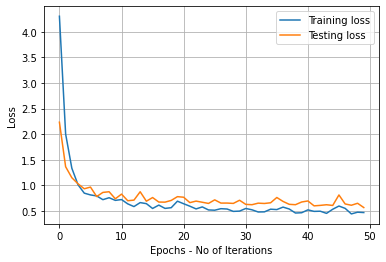

In [91]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs - No of Iterations')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

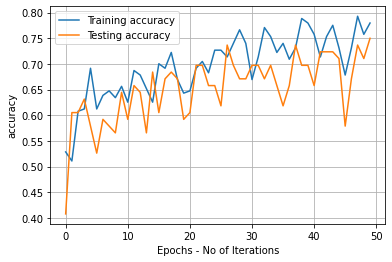

In [92]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs - No of Iterations')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()

In [93]:
ypred = m1.predict(x_test)
ypred

array([[0.05735591],
       [0.95958865],
       [0.9021511 ],
       [0.2792666 ],
       [0.9313531 ],
       [0.6771112 ],
       [0.8151783 ],
       [0.14584723],
       [0.0420489 ],
       [0.10631078],
       [0.7392812 ],
       [0.9391837 ],
       [0.2664498 ],
       [0.60879314],
       [0.65760165],
       [0.89043283],
       [0.89001435],
       [0.11066821],
       [0.7355074 ],
       [0.27771482],
       [0.7689726 ],
       [0.15893006],
       [0.58611655],
       [0.24164063],
       [0.392146  ],
       [0.573208  ],
       [0.85913306],
       [0.92793393],
       [0.19109768],
       [0.16603565],
       [0.5067441 ],
       [0.34540913],
       [0.55254877],
       [0.11045384],
       [0.7607039 ],
       [0.4044175 ],
       [0.334903  ],
       [0.7478776 ],
       [0.76100445],
       [0.90539765],
       [0.3922767 ],
       [0.6491314 ],
       [0.94614685],
       [0.6984802 ],
       [0.8293948 ],
       [0.3543806 ],
       [0.2810986 ],
       [0.747

In [94]:
# list comprehension
ypred_m1 = [1 if i>0.5 else 0 for i in ypred]
print(ypred_m1)

[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0]


In [95]:
print(list(y_test))

[1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))
# [TP=25  FN=7]
# [FP=16   TN=28]

[[24 11]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        35
           1       0.75      0.80      0.78        41

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



### Customization

In [98]:
from tensorflow.keras import initializers as init, regularizers as reg
from tensorflow.keras.optimizers import Adam, SGD,Adadelta, Adagrad

In [99]:
opt1=Adam(learning_rate=0.001,beta_1=0.8,beta_2=0.999,epsilon=1e-07)
opt2=SGD(learning_rate=0.01,momentum=0.0,nesterov=False)
opt3=Adagrad(learning_rate=0.001,initial_accumulator_value=0.1,epsilon=1e-07)
opt4=Adadelta(learning_rate=0.001,rho=0.95,epsilon=1e-07)

#cust_model.compile(optimizer=opt1)

In [100]:
dir(reg)

['L1L2',
 'Regularizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'get',
 'l1',
 'l1_l2',
 'l2',
 'serialize']

In [101]:
dir(init)

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [102]:
m2=Sequential()
m2.add(Dense(units=20, kernel_initializer=init.RandomNormal(mean=0.0,stddev=0.05),
             kernel_regularizer=reg.l1(0.1), activation='relu', input_dim=5))
m2.add (Dense(units=10,activation='relu'))
m2.add (Dense(units=1, activation= 'sigmoid'))
m2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])